In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [26]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS = 50

In [27]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
     shuffle = True,
     image_size = (IMAGE_SIZE,IMAGE_SIZE),
     batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [28]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [29]:
len(dataset)

68

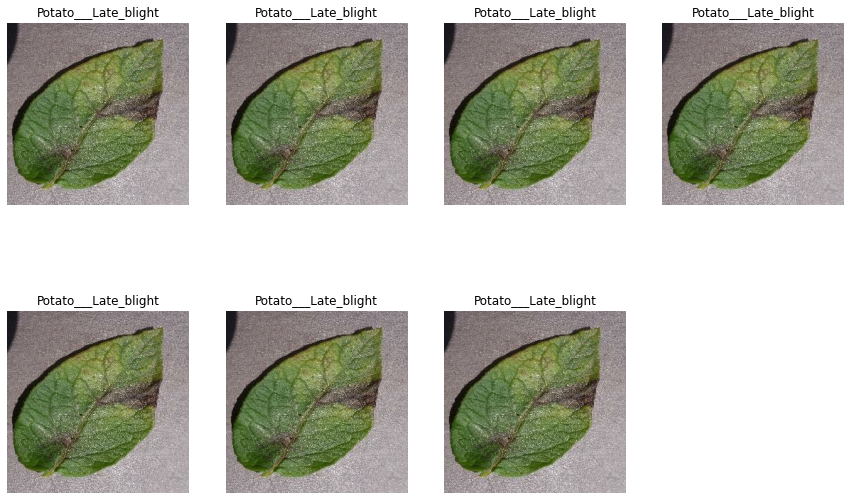

In [30]:
plt.figure(figsize= (15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(7):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis('off')

# Dataset Split
80% training 
10% Validation
10% testing


In [31]:
TRAIN_SIZE = 0.8
len(dataset) * TRAIN_SIZE


54.400000000000006

In [32]:
train_ds = dataset.take(54)
len(train_ds)

54

In [33]:
test_ds = dataset.skip(54) 
len(test_ds)

14

In [34]:
val_size = 0.1 
len(dataset) * val_size

6.800000000000001

In [35]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [36]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [37]:
def get_dataset_partitions_tf(ds,train_size = 0.8,val_size = 0.1 ,test_size = 0.1, shuffle = True, shuffle_size = 1000):
    ds_size = len(ds)
    train_size = int(train_size * ds_size)
    val_size =   int(val_size * ds_size)
    test_size = int(test_size * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(test_size)
    
    return train_ds,val_ds,test_ds


In [38]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [39]:
len(train_ds)

54

In [40]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [41]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [42]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [43]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation, 
    layers.Conv2D(32,(3,3) ,activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) ,activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) ,activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) ,activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) ,activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) ,activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])

model.build(input_shape = input_shape)

In [44]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [45]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data= val_ds)

Epoch 1/50
54/54 [==============================] - 226s 4s/step - loss: 0.9474 - accuracy: 0.4612 - val_loss: 0.8190 - val_accuracy: 0.5052
Epoch 2/50
54/54 [==============================] - 178s 3s/step - loss: 0.8596 - accuracy: 0.5399 - val_loss: 1.0521 - val_accuracy: 0.5625
Epoch 3/50
54/54 [==============================] - 178s 3s/step - loss: 0.7011 - accuracy: 0.6777 - val_loss: 0.4240 - val_accuracy: 0.8438
Epoch 4/50
54/54 [==============================] - 178s 3s/step - loss: 0.4647 - accuracy: 0.8177 - val_loss: 0.2978 - val_accuracy: 0.8750
Epoch 5/50
54/54 [==============================] - 178s 3s/step - loss: 0.4052 - accuracy: 0.8339 - val_loss: 0.3250 - val_accuracy: 0.8594
Epoch 6/50
54/54 [==============================] - 177s 3s/step - loss: 0.3305 - accuracy: 0.8675 - val_loss: 0.2864 - val_accuracy: 0.8958
Epoch 7/50
54/54 [==============================] - 177s 3s/step - loss: 0.2603 - accuracy: 0.9005 - val_loss: 0.2475 - val_accuracy: 0.8906
Epoch 8/50
54

In [25]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 7s 847ms/step - loss: 0.2501 - accuracy: 0.9009
